# **Predicting Hypothyrodism**

## 1. **Introduction**

<p>Hypothyroidism is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones. </p>
<p>Early diagnosis of overactive thyroid and the treatment of underlying causes can realive symptoms and prevent complications.</p>
<p>The challenge with hypothyrodism is that in the early stages, the symptoms may not be very pronounced.</p> 
<p>In this project, we will evaluate some common risk factors for hypothyrodism and to build a model that can predict whether an individual is likely to have the condition or not.</p>

### 1.1 **Defining the Research Question**

<p> Do the given risk factors determine whether a patient has hypothyrodism or not?</p>

### 1.2 **Metric for Success**

<p> We want to create a mode that has an accuracy level of at least 80%. </p>

## 2. **Reading the Data**

In [0]:
# Importing the libraries
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.style.use('bmh')

In [0]:
# Loading our dataset

hypo_df = pd.read_csv('/content/hypothyroid.csv')

## 3. **Checking the Data**

In [46]:
# Previewing the top of the dataset

hypo_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [47]:
# Previewing the bottom of our dataset

hypo_df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [48]:
# Checking the data types of our dataset

hypo_df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [49]:
# Checking information of our dataset

hypo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [50]:
# Describing the dataset

hypo_df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [51]:
# Checking the columns in our dataset

hypo_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [52]:
# We need to check the unique values for our data so that we understand how
# the data looks like

cols = hypo_df.columns.to_list()

for column in cols:
  print("Column:", column)

  print("\n")

  print("Unique Values:", hypo_df[column].unique())

  print("\n")

Column: status


Unique Values: ['hypothyroid' 'negative']


Column: age


Unique Values: ['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


Column: sex


Unique Values: ['M' 'F' '?']


Column: on_thyroxine


Unique Values: ['f' 't']


Column: query_on_thyroxine


Unique Values: ['f' 't']


Column: on_antithyroid_medication


Unique Values: ['f' 't']


Column: thyroid_surgery


Unique Values: ['f' 't']


Column: query_hypothyroid


Unique Values: ['f' 't']


Column: query_hyperthyroid


Unique Values: ['f' 't']


Column: pregnant


Unique Values: ['f' 't']


Column: sick


Uniq

>> From the unique values generated above, it is clear that there are some special characters in the entries. The columns with special character are ['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'].

## 4. **Cleaning the Data**

In [53]:
# Checking for null values

hypo_df.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [54]:
# We need to set record with special character ? to null values so
# that we can deal with them appropriately 

question_mark = ['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for column in question_mark:
    hypo_df[column] = hypo_df[column].replace('?', np.NaN)

# Checking to see whether the null values are still visible

print(hypo_df.isna().sum())

print("\n")

# Checking the datatypes

print(hypo_df.dtypes)

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64


status                       object
age                          object
sex                          

In [55]:
# Our the columns are not in object type and we need to convert them to floats

columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for i in columns:
  hypo_df = hypo_df.astype({i: 'float64'})

# Checking the dtypes

hypo_df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [56]:

# We need to fill the missing values in our columns 
# For our numerical columns we will fill the null values with the mean for each column

columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for column in columns:
    hypo_df[column] = hypo_df[column].fillna(hypo_df[column].mean())

# for the sex column, we will fill the null values with zero

    
hypo_df['sex'] = hypo_df['sex'].fillna(hypo_df['sex'].mode()[0])

# checking to see whether the all null values have been filled

hypo_df.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
# Droping the duplicates 

hypo_df.drop_duplicates(inplace=True)

Outlier ranges for Taken Cars.
 [[], [30.0, 145.0, 430.0, 138.0, 21.0, 92.0, 48.0, 21.0, 36.0, 15.0, 15.3, 25.0, 15.0, 61.0, 28.0, 170.0, 54.0, 216.0, 56.0, 71.0, 46.0, 70.0, 34.0, 53.0, 126.0, 25.0, 530.0, 34.0, 35.0, 65.0, 57.0, 125.0, 30.0, 25.0, 23.0, 80.0, 36.0, 117.0, 49.0, 35.0, 30.0, 80.0, 66.0, 150.0, 53.0, 35.0, 30.0, 65.0, 18.0, 165.0, 164.0, 24.0, 90.0, 77.0, 19.0, 58.0, 100.0, 213.0, 17.0, 145.0, 235.0, 153.0, 31.0, 109.0, 260.0, 43.0, 30.0, 55.0, 17.0, 54.0, 20.0, 25.0, 28.0, 60.0, 140.0, 33.0, 82.0, 45.0, 42.0, 30.0, 19.0, 25.0, 41.0, 31.0, 160.0, 16.0, 41.0, 89.0, 28.0, 44.0, 25.0, 15.0, 34.0, 70.0, 100.0, 80.0, 176.0, 16.0, 35.0, 18.0, 89.0, 183.0, 29.0, 37.0, 39.0, 145.0, 59.0, 53.0, 68.0, 38.0, 30.0, 47.0, 44.0, 143.0, 150.0, 288.0, 41.0, 96.0, 22.0, 30.0, 16.5, 100.0, 14.9, 24.0, 15.0, 27.0, 19.2, 17.0, 28.0, 34.0, 18.0, 52.0, 26.0, 36.0, 66.0, 22.0, 26.0, 17.0, 178.0, 40.0, 24.0, 22.0, 27.0, 27.0, 18.0, 24.0, 200.0, 20.0, 19.0, 86.0, 21.0, 16.0, 28.0, 17.4, 85.0, 3

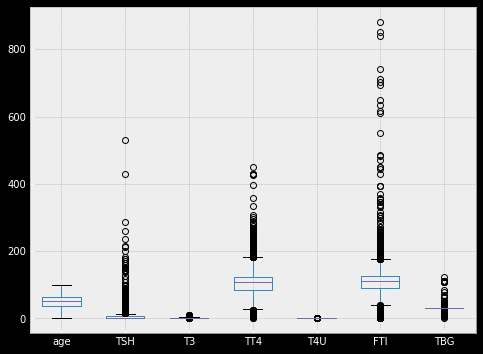

In [58]:
# Checking for outliers in the numeric columns 

plt.figure(figsize=(8,6))
hypo_numeric = hypo_df[columns]

_t, df_outliers = pd.DataFrame.boxplot(hypo_numeric, return_type="both", widths=0.6)

outliers = [flier.get_ydata() for flier in df_outliers["fliers"]]
out_liers = [i.tolist() for i in outliers]

# pring a list containing our outliers and boxplots for our outliers
print("Outlier ranges for Taken Cars.\n", out_liers)



In [0]:
# Fucntion for counting number of outliers in our data columns and cheking the percentage for each
# ----
#
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [60]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in hypo_numeric:
    rows, columns = hypo_numeric.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(hypo_numeric[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

age has 0 outliers in total, which is 0.0% of data
TSH has 46 outliers in total, which is 1.5% of data
T3 has 40 outliers in total, which is 1.3% of data
TT4 has 39 outliers in total, which is 1.3% of data
T4U has 93 outliers in total, which is 3.0% of data
FTI has 36 outliers in total, which is 1.2% of data
TBG has 33 outliers in total, which is 1.1% of data


> While there are outliers in out data, we are not going to get rid of them. This is because we need this data to create a good model.

## 5. **Exploratory Data Analysis**

In [61]:
# before starting EDA let us first preview our dataset

hypo_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,31.283077
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,31.283077
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,31.283077
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,31.283077
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,31.283077


In [62]:
# We need to separate the numeric variables from categorical variables
# First we separate the numeric columns

columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

hypo_numeric = hypo_df[columns]

hypo_numeric.head()

,age,TSH,T3,TT4,T4U,FTI,TBG
0,72.0,30.0,0.6,15.0,1.48,10.0,31.283077
1,15.0,145.0,1.7,19.0,1.13,17.0,31.283077
2,24.0,0.0,0.2,4.0,1.00,0.0,31.283077
3,24.0,430.0,0.4,6.0,1.04,6.0,31.283077
4,77.0,7.3,1.2,57.0,1.28,44.0,31.283077


In [63]:
# We then separate the categorical columns

columns_all = hypo_df.columns.to_list()  # generating a list of all columns


columns_all.remove('age') # removing colums with numeric values
columns_all.remove('TSH') 
columns_all.remove('T3')
columns_all.remove('TT4') 
columns_all.remove('T4U') 
columns_all.remove('FTI')  
columns_all.remove('TBG')  

hypo_categorical = hypo_df[columns_all] # creating dataframe of our caterical variables

hypo_categorical.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n


### 5.1 **Univariate Analysis**

In [64]:
hypo_df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.118453,5.826107,1.935006,108.718049,0.977608,115.482038,31.265756
std,17.854437,22.181031,0.864830,42.836488,0.216873,57.780972,5.529154
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000,31.283077
50%,51.154214,1.000000,1.939749,107.000000,0.978199,110.000000,31.283077
75%,64.000000,5.923180,2.200000,124.000000,1.050000,126.000000,31.283077
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [65]:
hypo_categorical.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'TBG_measured'],
      dtype='object')

In [66]:
# Getting the frequency table of the categorical variables

for col in hypo_categorical:
  print(hypo_categorical[col].value_counts())
  print("\n")

negative       2945
hypothyroid     141
Name: status, dtype: int64


F    2192
M     894
Name: sex, dtype: int64


f    2640
t     446
Name: on_thyroxine, dtype: int64


f    3031
t      55
Name: query_on_thyroxine, dtype: int64


f    3044
t      42
Name: on_antithyroid_medication, dtype: int64


f    2983
t     103
Name: thyroid_surgery, dtype: int64


f    2851
t     235
Name: query_hypothyroid, dtype: int64


f    2851
t     235
Name: query_hyperthyroid, dtype: int64


f    3025
t      61
Name: pregnant, dtype: int64


f    2989
t      97
Name: sick, dtype: int64


f    3046
t      40
Name: tumor, dtype: int64


f    3084
t       2
Name: lithium, dtype: int64


f    2990
t      96
Name: goitre, dtype: int64


y    2631
n     455
Name: TSH_measured, dtype: int64


y    2406
n     680
Name: T3_measured, dtype: int64


y    2846
n     240
Name: TT4_measured, dtype: int64


y    2847
n     239
Name: T4U_measured, dtype: int64


y    2848
n     238
Name: FTI_measured, dtype: int64


n  

In [67]:
hypo_categorical.drop('TBG_measured', inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


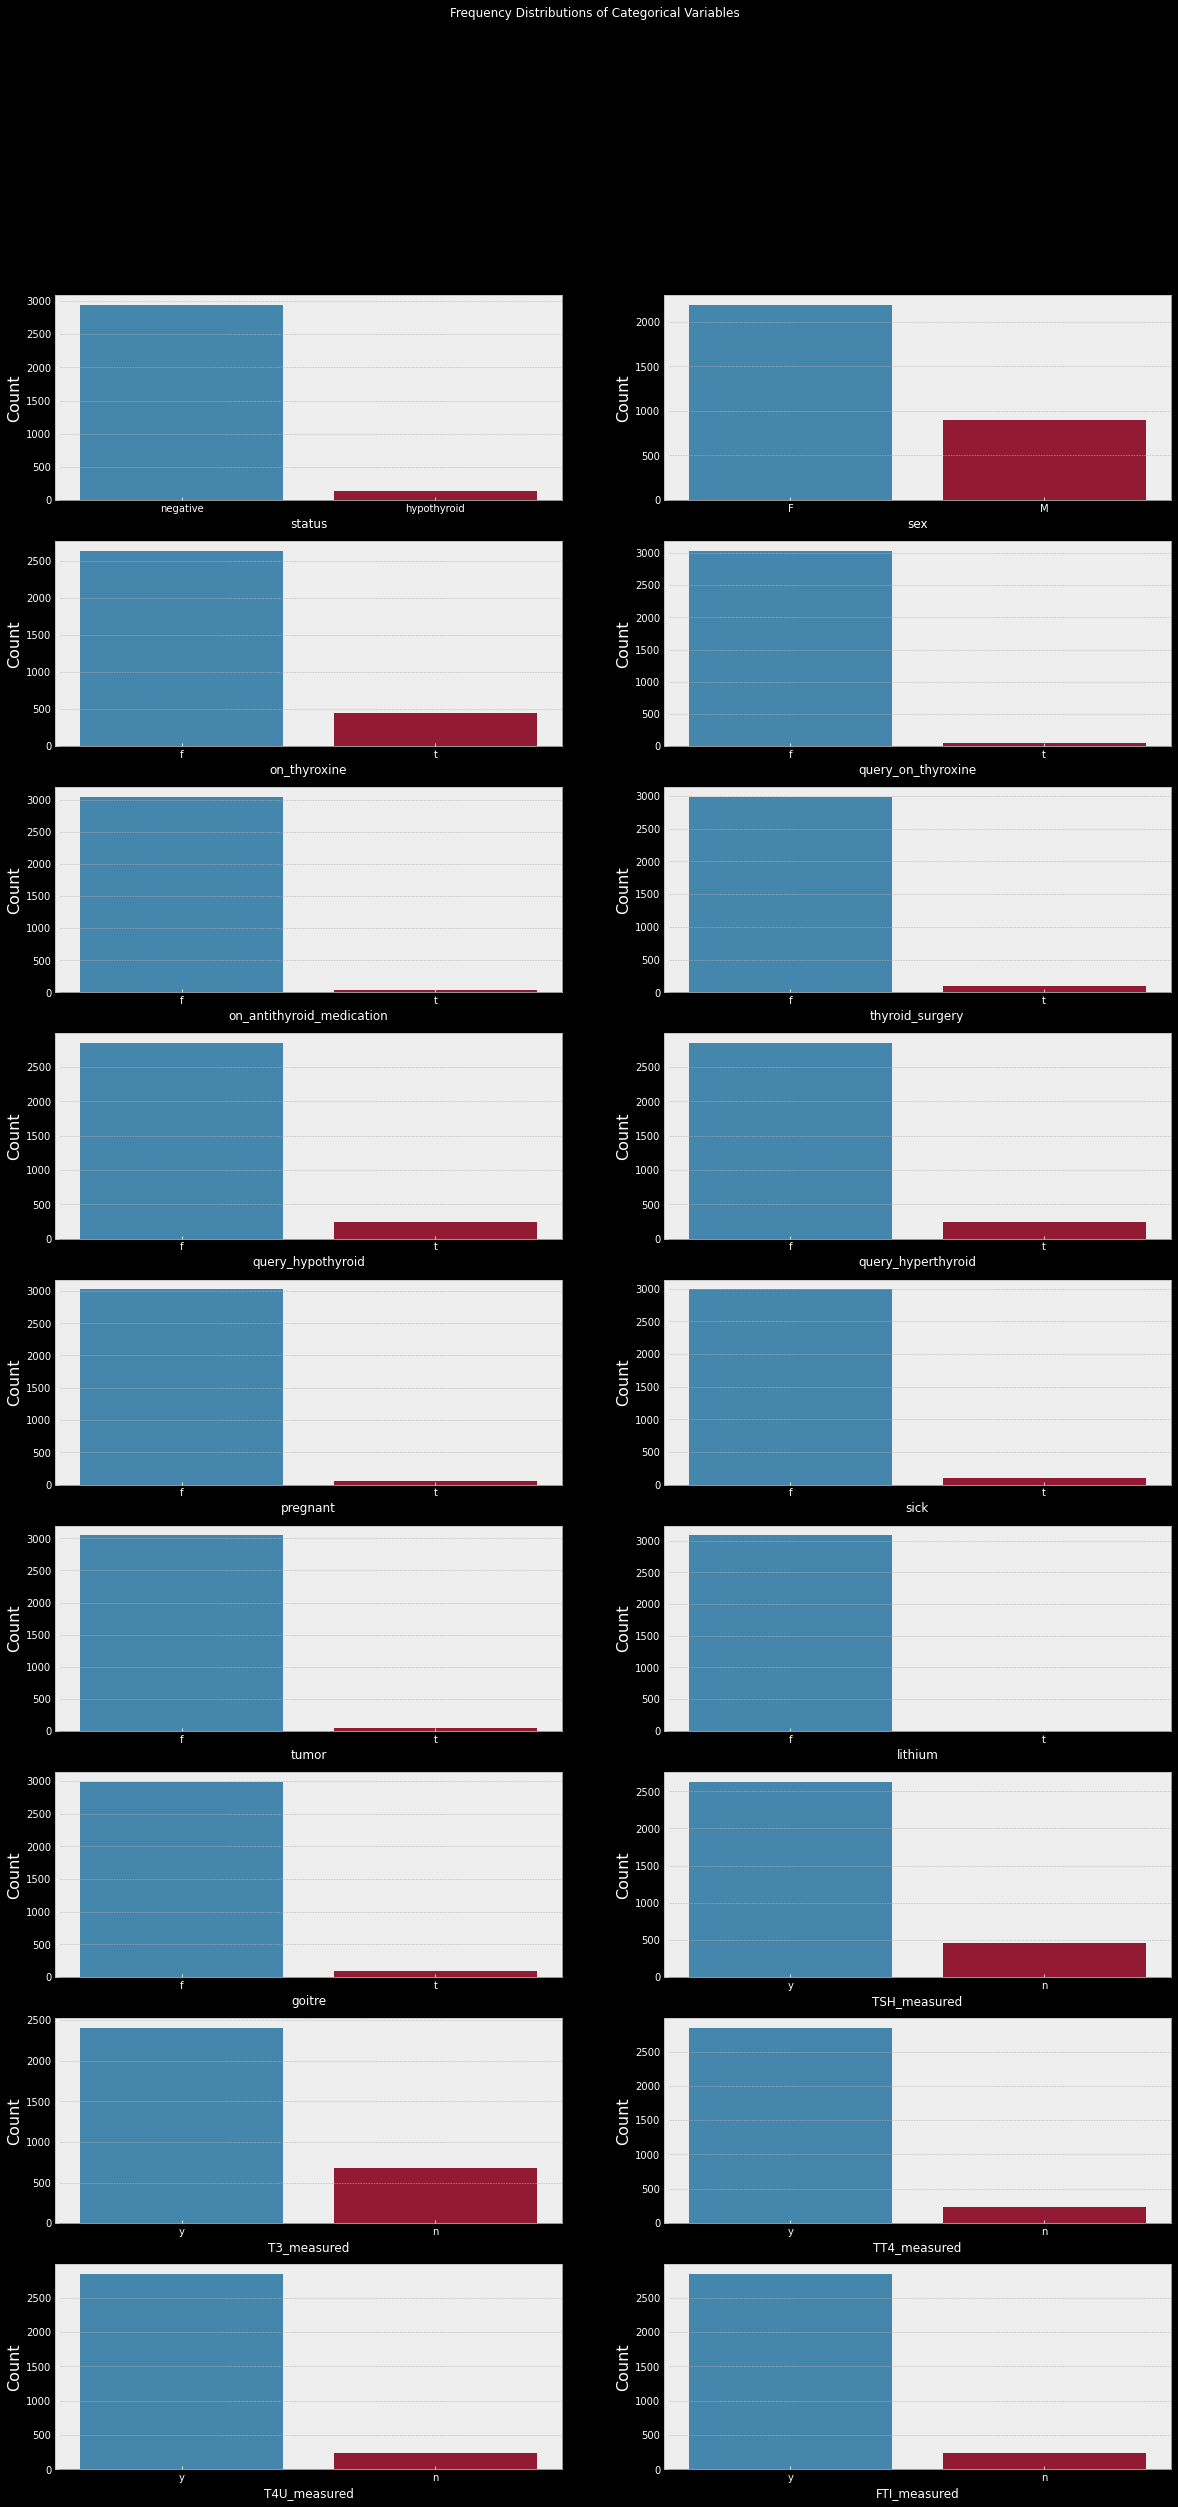

In [68]:
# Plotting sublots for our categorical variables.
#
fig, (ax) = plt.subplots(9,2, figsize=(20, 40))
fig.suptitle('Frequency Distributions of Categorical Variables')
ax = ax.flatten()

#iterating our columns as we plot
for i, col in enumerate(hypo_categorical):
    sns.barplot(hypo_categorical[col].value_counts().keys(), hypo_categorical[col].value_counts(), ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count', fontsize=16)
      
plt.show()

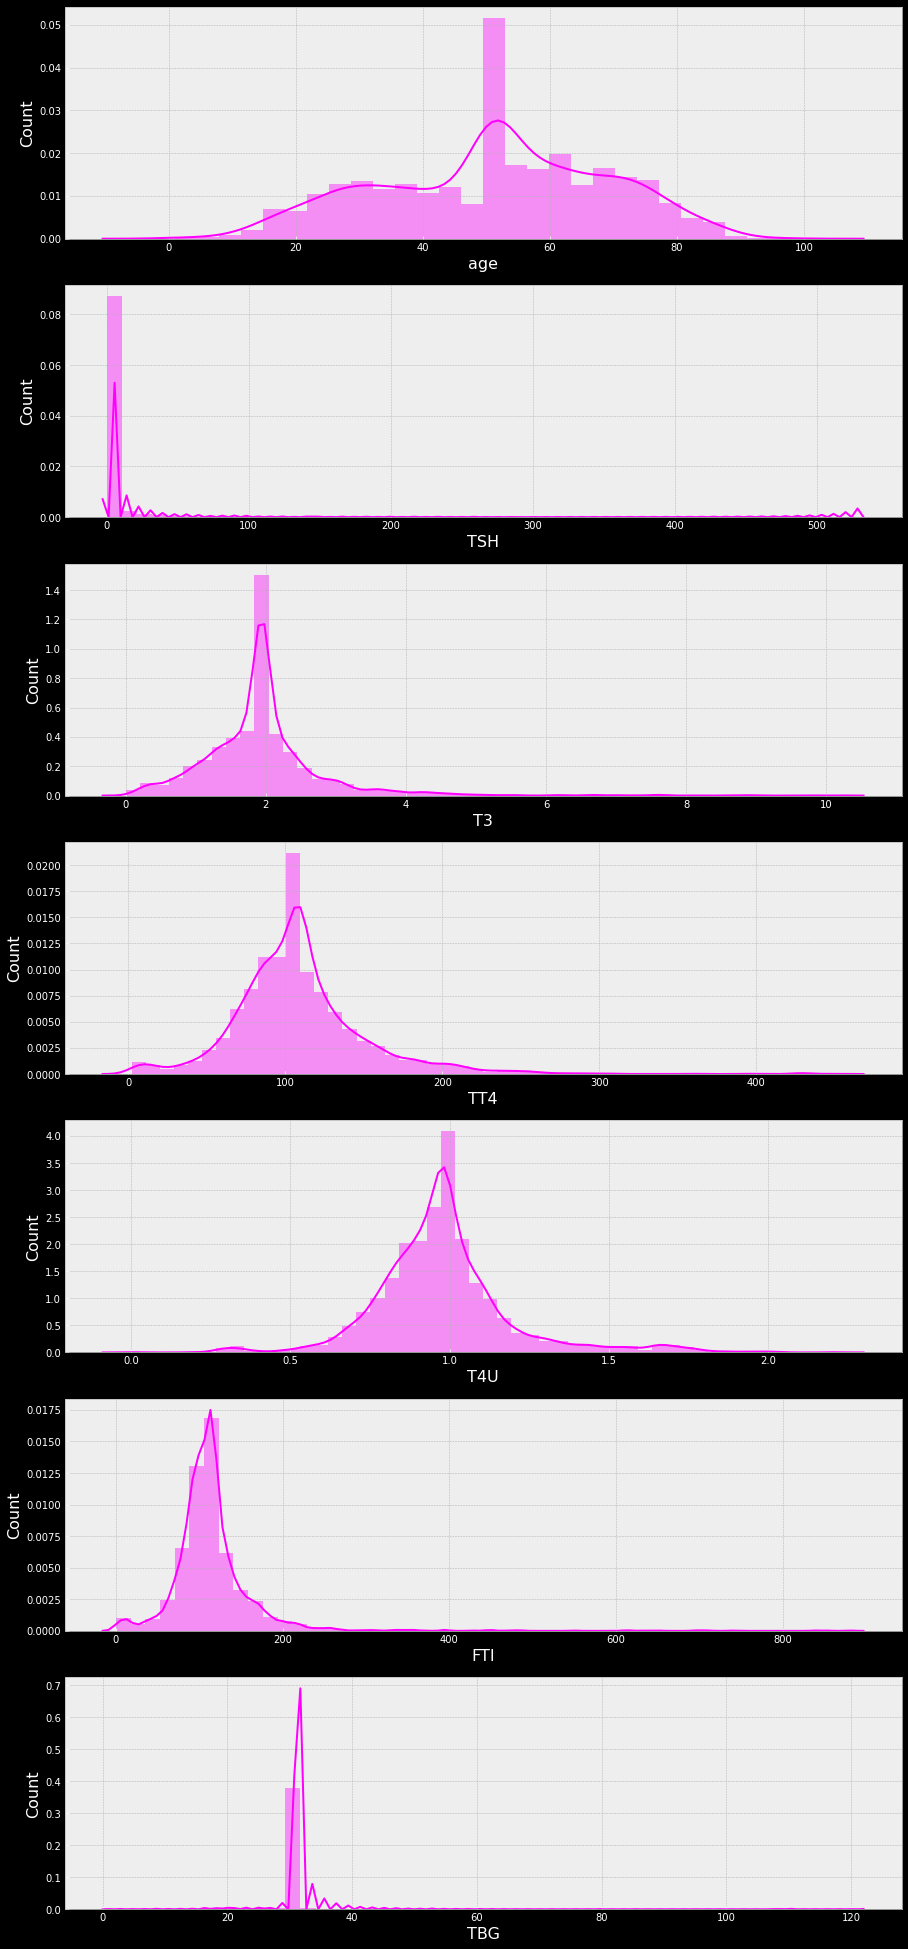

In [69]:
# Frequency distribution for our numeric variables
#
fig, ax = plt.subplots(len(hypo_numeric.columns), figsize=(15,35))

for i, col_val in enumerate(hypo_numeric):
  sns.distplot(hypo_numeric[col_val], hist=True, ax=ax[i], color='magenta')
  ax[i].set_xlabel(col_val, fontsize=16)
  ax[i].set_ylabel('Count', fontsize=16)

plt.show()

> Our numeric variables have normal distribution apart from TBG and TSH which are skewed to the right.

### 5.2 **Bivariate Analysis**

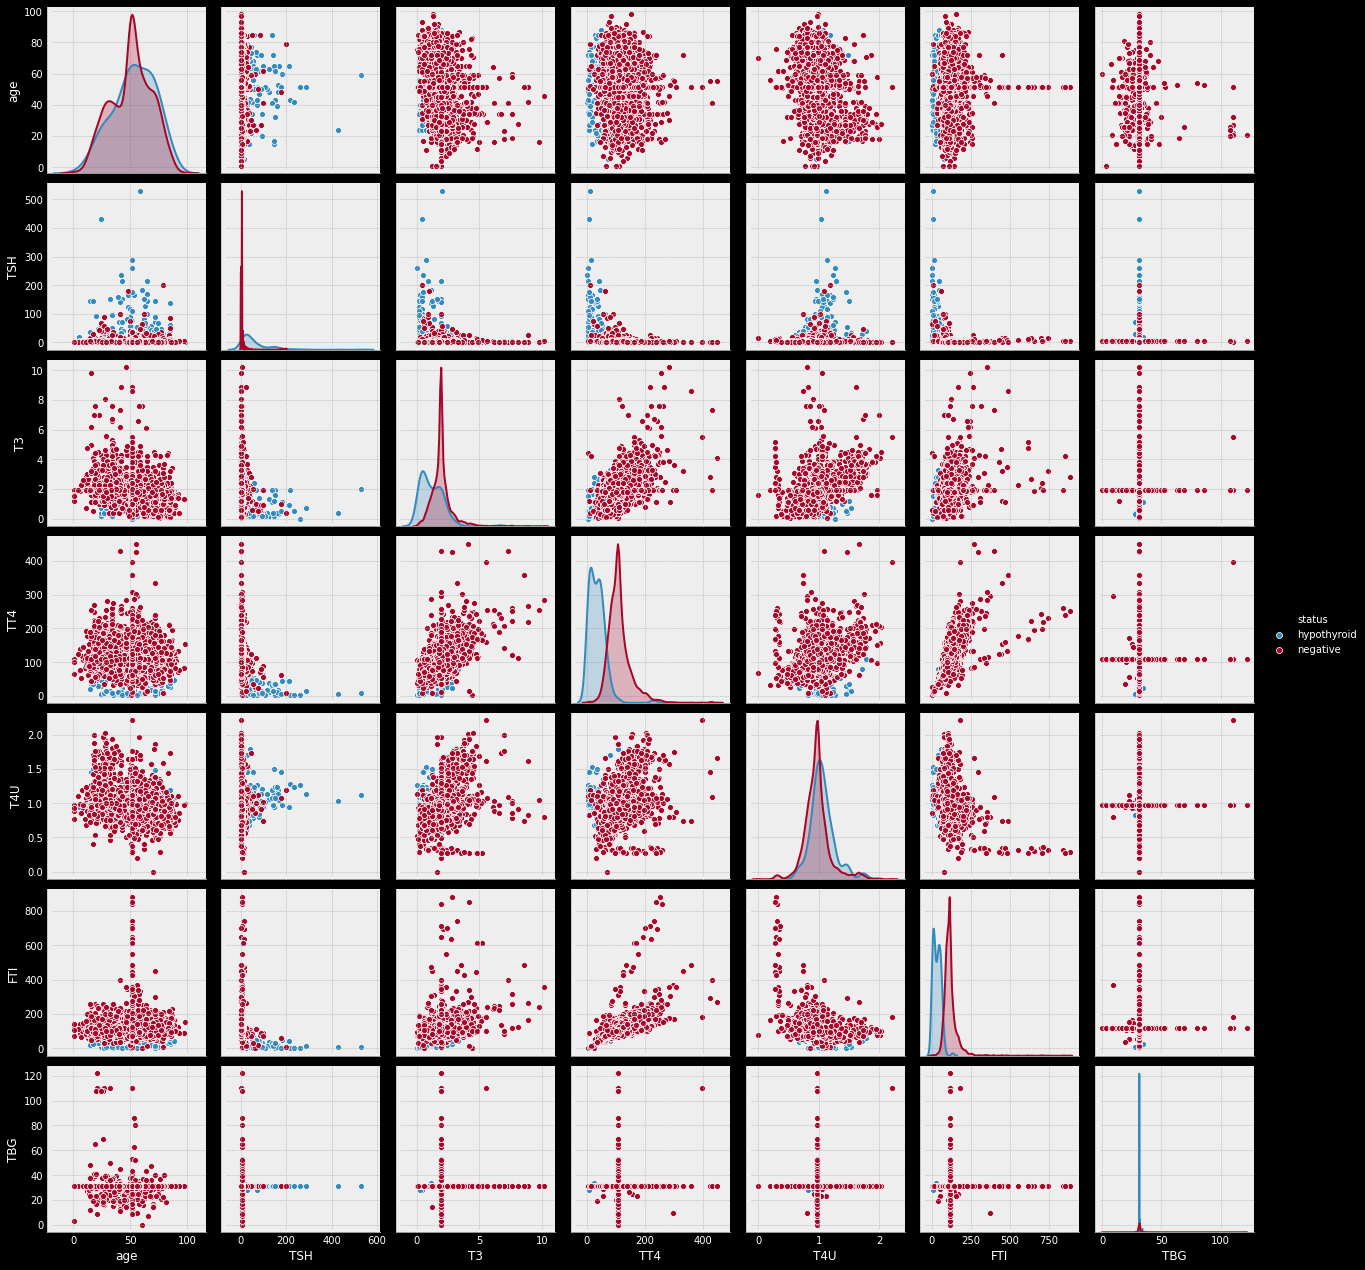

In [70]:
# Scartter Plots 

sns.pairplot(hypo_df, kind = "scatter", diag_kind = "kde", vars = hypo_numeric, hue = "status")

plt.show()

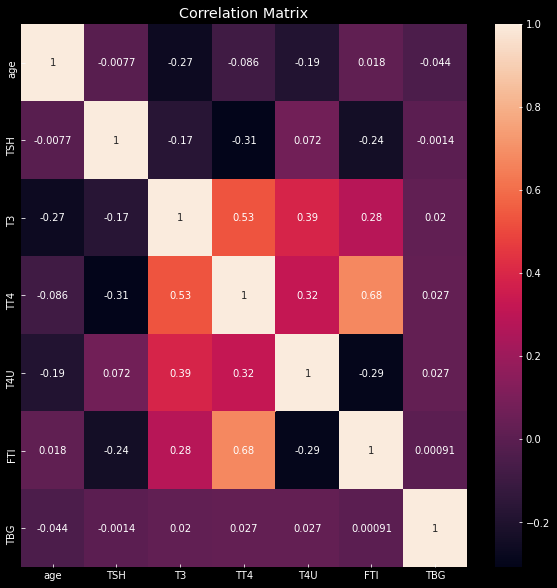

In [71]:
# Plotting heatmap to show how our numeric variables correlate
plt.figure(figsize=(10,10))

sns.heatmap(hypo_numeric.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

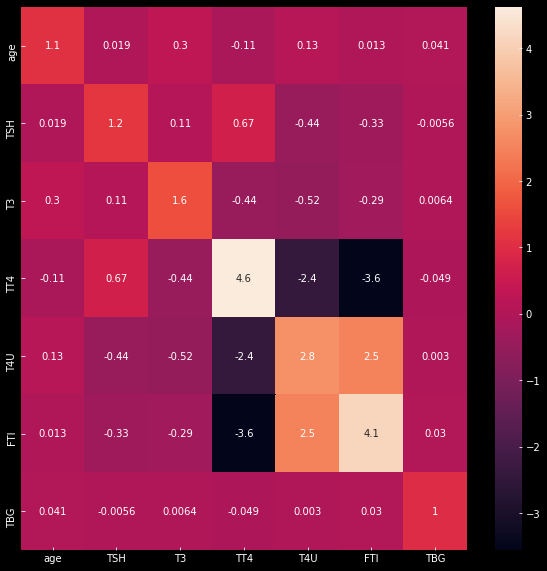

In [72]:
# Checking multicorrelation between variables

hypo_corr = hypo_numeric.corr()

hypo_vif = pd.DataFrame(np.linalg.inv(hypo_corr.values), index = hypo_corr.index, columns = hypo_corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (10, 10))

sns.heatmap(hypo_vif, annot = True)

## 6. **Feature Engineering** 

In [73]:
# Previewing our dataset

hypo_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,31.283077
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,31.283077
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,31.283077
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,31.283077
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,31.283077


In [0]:
# Dropping features we will not be using in our models

hypo_df.drop(['TSH_measured', 'T3_measured', 'T4U_measured', 'TBG_measured','TT4_measured','FTI_measured'], inplace=True, axis=1)

In [75]:
hypo_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0,31.283077
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0,31.283077
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0,31.283077
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0,31.283077
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0,31.283077


In [0]:
# Lable Encoding the categorical features

from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()

hypo_encoding = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
                 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant','sick',
                 'tumor', 'lithium', 'goitre']

for item in hypo_encoding:
  hypo_df[item] = en.fit_transform(hypo_df[item])

In [77]:
# previewing the encoded dataframe

hypo_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,TBG
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,31.283077
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,31.283077
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,31.283077
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,31.283077
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,31.283077


## 7. **Part 1: Decision Trees**

### 7.1 **Random Trees**

In [0]:
# separating features for dependent and indepdent variables

X = hypo_df.drop(columns = ['status']).values

y = hypo_df.status.values

In [0]:
# Getting our features

features = hypo_df.columns.to_list()
features.remove('status')

In [0]:
# We split the dataset into training and test set

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [0]:
# Importing the rando forest classifier

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20,
                              max_depth = 5)

# fitting our model to our training data
forest.fit(X_train, y_train)

# make predictions using our forest
y_pred = forest.predict(X_test)

In [85]:
# comparing actual values with predicted values

comparison_frame = pd.DataFrame({'Actual' : y_test.flatten(),'Predicted' : y_pred.flatten()})

print(comparison_frame.head())

print("\n")

print(comparison_frame.describe())

   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1


           Actual   Predicted
count  926.000000  926.000000
mean     0.957883    0.963283
std      0.200964    0.188168
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [86]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.990280777537797


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


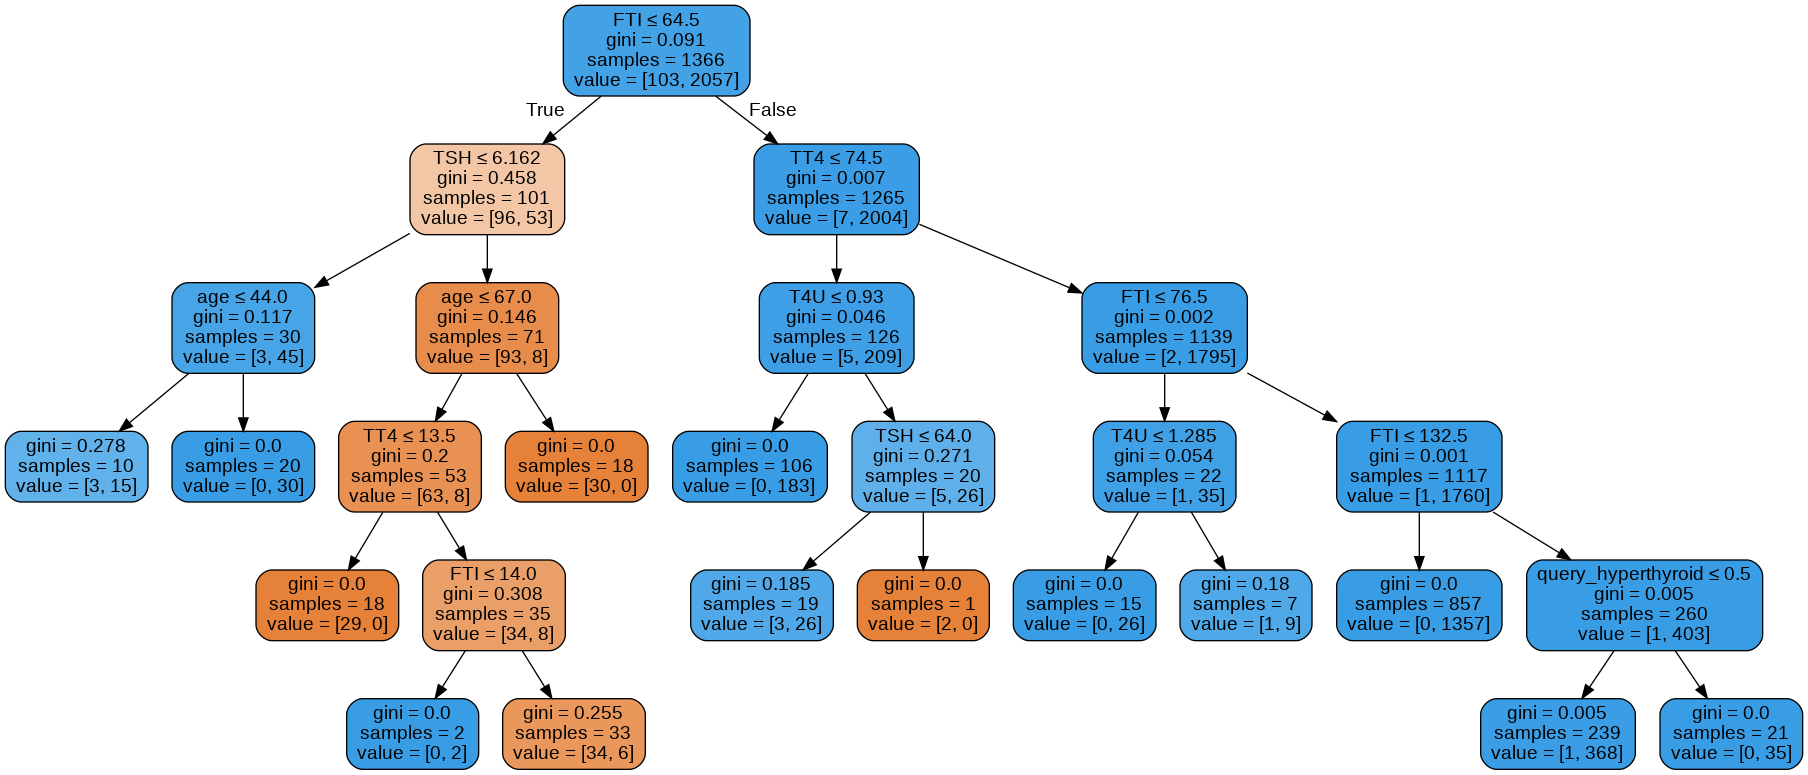

In [87]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

# picking tree number 50 from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = True,special_characters = True,
                feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid.png')
Image(graph.create_png())

In [88]:
importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]

# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances

[('FTI', 0.68),
 ('TSH', 0.3),
 ('age', 0.01),
 ('TT4', 0.01),
 ('T4U', 0.01),
 ('sex', 0.0),
 ('on_thyroxine', 0.0),
 ('query_on_thyroxine', 0.0),
 ('on_antithyroid_medication', 0.0),
 ('thyroid_surgery', 0.0),
 ('query_hypothyroid', 0.0),
 ('query_hyperthyroid', 0.0),
 ('pregnant', 0.0),
 ('sick', 0.0),
 ('tumor', 0.0),
 ('lithium', 0.0),
 ('goitre', 0.0),
 ('T3', 0.0),
 ('TBG', 0.0)]

### 7.2 **Ada Boosted Trees**

In [105]:
from sklearn.ensemble import AdaBoostClassifier


ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                          n_estimators=100, random_state=0)

# Training the adaboosted model

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

# comparing actual values to predicted values
comparison_ada = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : y_pred_ada.flatten()})

print(comparison_ada.head())

print("\n")

print(comparison_ada.describe())

   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1


           Actual   Predicted
count  926.000000  926.000000
mean     0.957883    0.957883
std      0.200964    0.200964
min      0.000000    0.000000
25%      1.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000


In [106]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

Accuracy: 0.9870410367170627


### 7.3 **Gradient Boosted Trees**

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
# We want to use several learning rates so that we can figureout what rate is best for our model
# first we create a list with six learning rates

learning_rates = [0.01, 0.05, 0.25, 0.75, 1, 0.35]

for learning_rate in learning_rates:
    grad = GradientBoostingClassifier(n_estimators = 100, max_depth = 1,
                                     learning_rate = learning_rate,
                                     random_state = 0, min_samples_split=10 )
    grad.fit(X_train, y_train)

    y_pred_grad = grad.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_grad)

    print("Learning rate:", learning_rate)

    print("Accuracy Score: {%.2f%%}" % (accuracy * 100.0))    

    print("\n")                        

Learning rate: 0.01
Accuracy Score: {98.60%}


Learning rate: 0.05
Accuracy Score: {99.46%}


Learning rate: 0.25
Accuracy Score: {99.57%}


Learning rate: 0.75
Accuracy Score: {95.79%}


Learning rate: 1
Accuracy Score: {95.79%}


Learning rate: 0.35
Accuracy Score: {99.46%}




> The best learning rate to use is 0.25 which has the higest accuracy score.

## 8. **Part 2: SVM**

In [0]:
# separating features for dependent and indepdent variables

X = hypo_df.drop(columns = ['status']).values

y = hypo_df.status.values

In [0]:
# We split the dataset into training and test set

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 8.1 **Linear Kernel**

In [134]:
# importing our SVM model and setting kernel to linear

from sklearn.svm import SVC

linear_kernel = SVC(kernel = 'linear')

# fitting our model

linear_kernel.fit(X_train, y_train)

# making predictions

y_pred_linear = linear_kernel.predict(X_test)

# Getting the models accuracy

print("Linear kernel Score:", accuracy_score(y_test, y_pred_linear)*100)

Linear kernel score: 98.92008639308855


### 8.2 **Polynomial Kernel**

In [138]:
# Implementing polynomial kernel

poly = SVC(kernel = 'poly', gamma = 'auto')

# training the model
poly.fit(X_train, y_train)

# Prediction
y_pred_poly = poly.predict(X_test)

# Getting score for the model

print("Polynomial kernel score:", accuracy_score(y_test, y_pred_poly)*100)


Polynomial kernel score: 98.48812095032397


### 8.3 **Radial Basis Function (RBF)**

In [137]:
# Implementing SVC with RBF

rbf = SVC(kernel = 'rbf', gamma = 'auto')

# Trainning the model

rbf.fit(X_train, y_train)

# Using our model to predict
y_pred_rbf = rbf.predict(X_test)

# Getting the score for the model
print("RBF kernel score:", accuracy_score(y_test, y_pred_rbf))

RBF kernel score: 0.9568034557235421


> Linear Kernel has achieve the highest accuracy which means that it is the best model for predicting our data. The other support vector machine model have also achieved very high accuracy.

## **9. Conclusion** 

All the models achieve very high accuracy which means that they are prone to overfitting. There is a need to tune the parameters further as well as conduct more feature engineering to ensure that we have the best models that are not prone to overfitting.